### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate,            Bi-variate, and multivariate analysis).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


#####  Let's visualize the spread of each variable in the dataset 

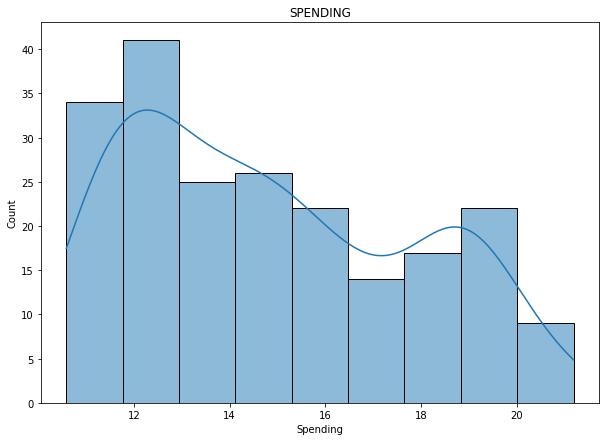

In [8]:
# Spending
plt.figure(figsize = (10,7))
plt.title('SPENDING')
plt.xlabel('Spending')
sns.histplot(x = 'spending', data = df, kde=True);

### 
More than 40 customer spending between 12k - 13k, which conrtributes the highest among spending.

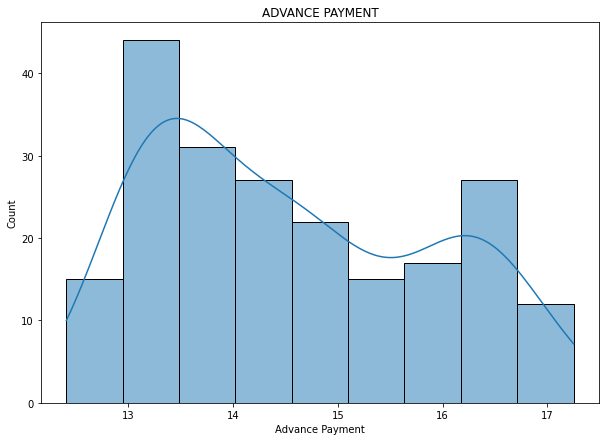

In [9]:
# Advance payment
plt.figure(figsize = (10,7))
plt.title('ADVANCE PAYMENT')
plt.xlabel('Advance Payment')
sns.histplot(x = 'advance_payments', data = df, kde=True);

###   
Similar to spending more than 40 customers pay 13 -13.5(100s) in advance.

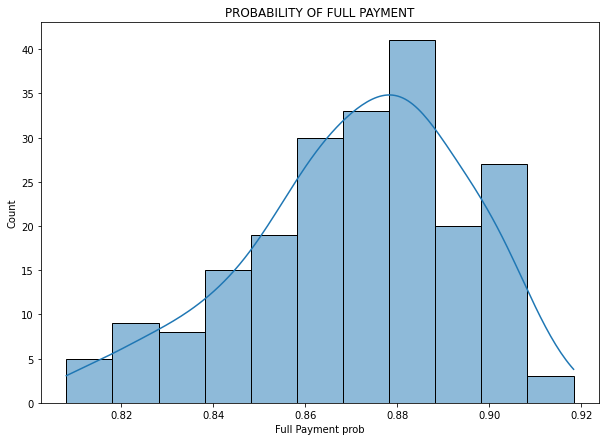

In [10]:
# Prob of full payment
plt.figure(figsize = (10,7))
plt.title('PROBABILITY OF FULL PAYMENT')
plt.xlabel('Full Payment prob')
sns.histplot(x = 'probability_of_full_payment', data = df, kde=True);

###  
Almost 40 customers have 89% probability of paying full amount

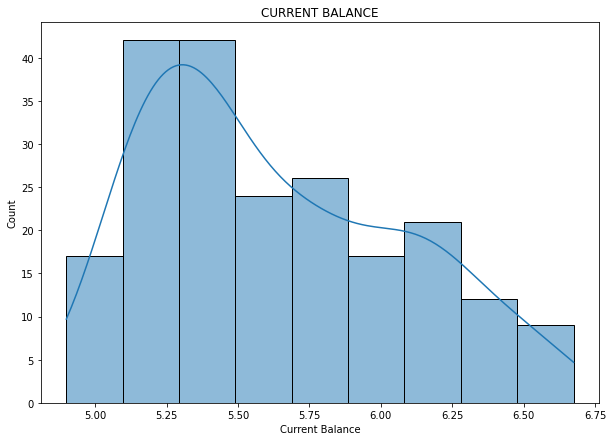

In [11]:
# Current Balance
plt.figure(figsize = (10,7))
plt.title('CURRENT BALANCE')
plt.xlabel('Current Balance')
sns.histplot(x = 'current_balance', data = df, kde=True);

###  
More than 40 customers have a current balanace ranging between 5.25k- 5.50k

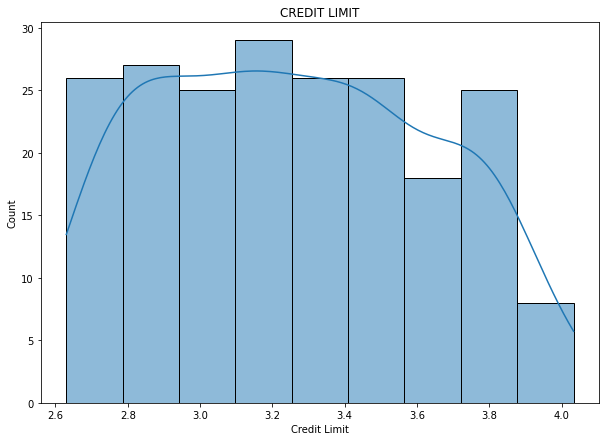

In [12]:
# Credit limit
plt.figure(figsize = (10,7))
plt.title('CREDIT LIMIT')
plt.xlabel('Credit Limit')
sns.histplot(x = 'credit_limit', data = df, kde=True);

###  
Almost 30 customers have a credit limit of 32000, which is the highest.
While, less then 10 cutomers have a credit limit of 40000.

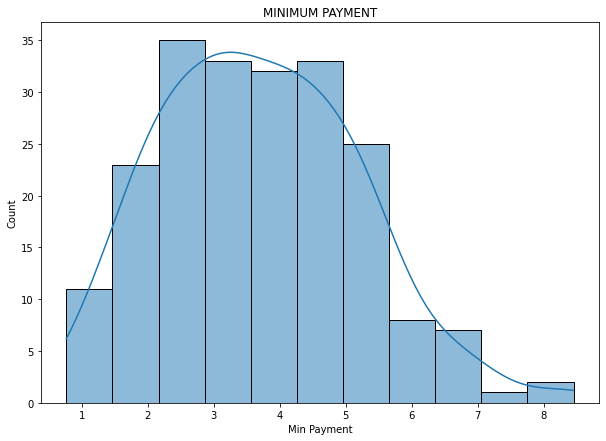

In [13]:
# Minimum Payment amount
plt.figure(figsize = (10,7))
plt.title('MINIMUM PAYMENT')
plt.xlabel('Min Payment')
sns.histplot(x = 'min_payment_amt', data = df, kde=True);

### 
Most customers pay minimum payment amount ranging between 250 - 500

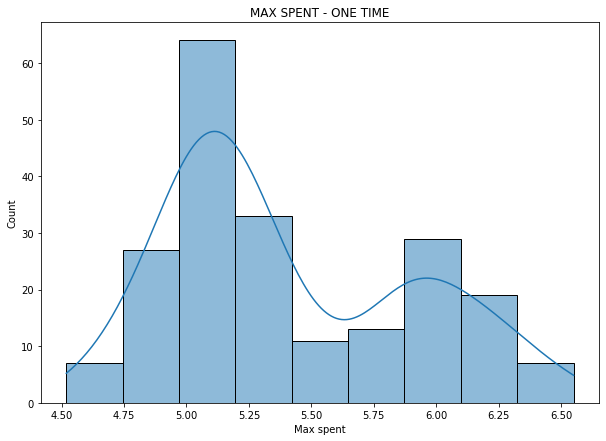

In [14]:
plt.figure(figsize = (10,7))
plt.title('MAX SPENT - ONE TIME')
plt.xlabel('Max spent')
sns.histplot(x = 'max_spent_in_single_shopping', data = df, kde=True);

### 
More than 60 customers spend maximum of 5k in a single shopping

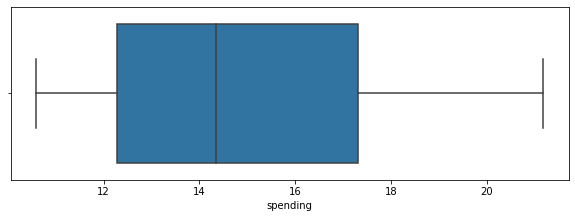

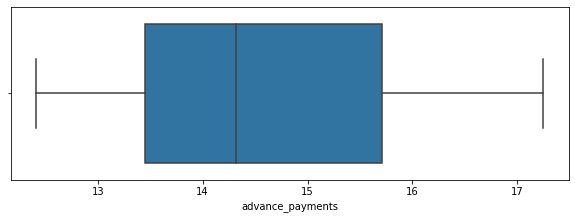

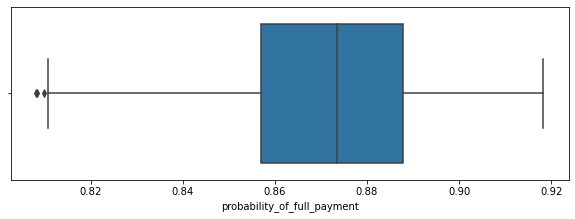

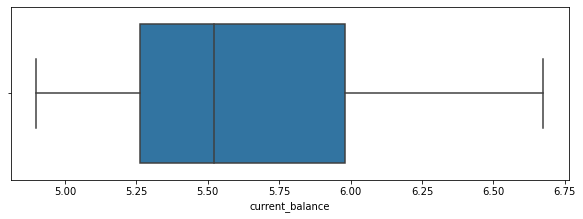

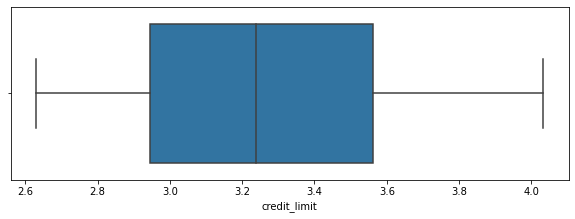

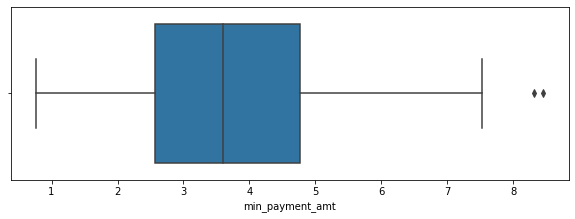

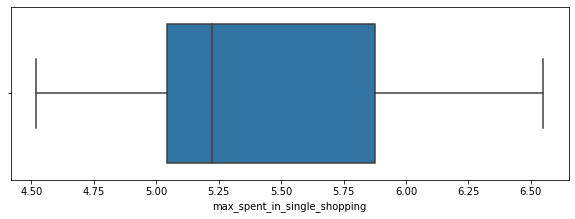

In [15]:
# Now let us visualize and see if there is any outliers across the variable in the dataset

for columns in df:
        plt.figure(figsize = (10,7))
        plt.subplot(2,1,2)
        sns.boxplot(data = df, x = columns)

####   
Looking at the boxplots of each variable it is clear that only  min_payment_amt variable and probability_of_full_payment has outlier.

In [16]:
# Now let us deal with the outliers 

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1  
    lower_range = Q1 -(1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range,upper_range


print(remove_outlier(df['min_payment_amt']))
print(remove_outlier(df['probability_of_full_payment']))

(-0.7493749999999992, 8.079625)
(0.8105875, 0.9340875)


In [17]:
# Treating outliers

df['min_payment_amt'] = np.where(df['min_payment_amt'] > 8.079625, 8.079625, df['min_payment_amt'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] < 0.8105875, 0.8105875, df['probability_of_full_payment'])

<AxesSubplot:>

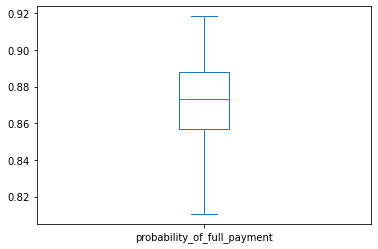

In [18]:
df['probability_of_full_payment'].plot(kind='box')

<AxesSubplot:>

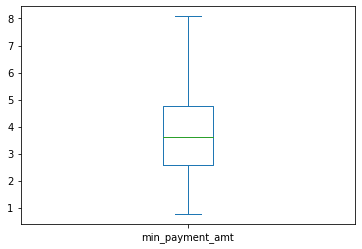

In [19]:
df['min_payment_amt'].plot(kind='box')

####   
Now we can see that there are no outliers after treating outliers

In [20]:
#Checcking skewness

df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.522793
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.360001
max_spent_in_single_shopping    0.561897
dtype: float64

### 
It is clear that only probability_of_full_payment is left skewed and the rest are right skewed

In [21]:
# Now let us see the correlation between each  variable

corr = df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


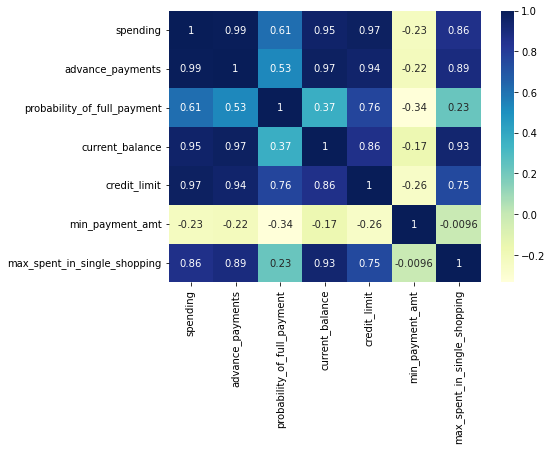

In [22]:
# we can also visualize the corr using the heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data = corr, annot=True, cmap='YlGnBu');

###    
We can clearly see that advance payment and spending has the highest correlation. While, current balance and minimum payment amount has the least correlation

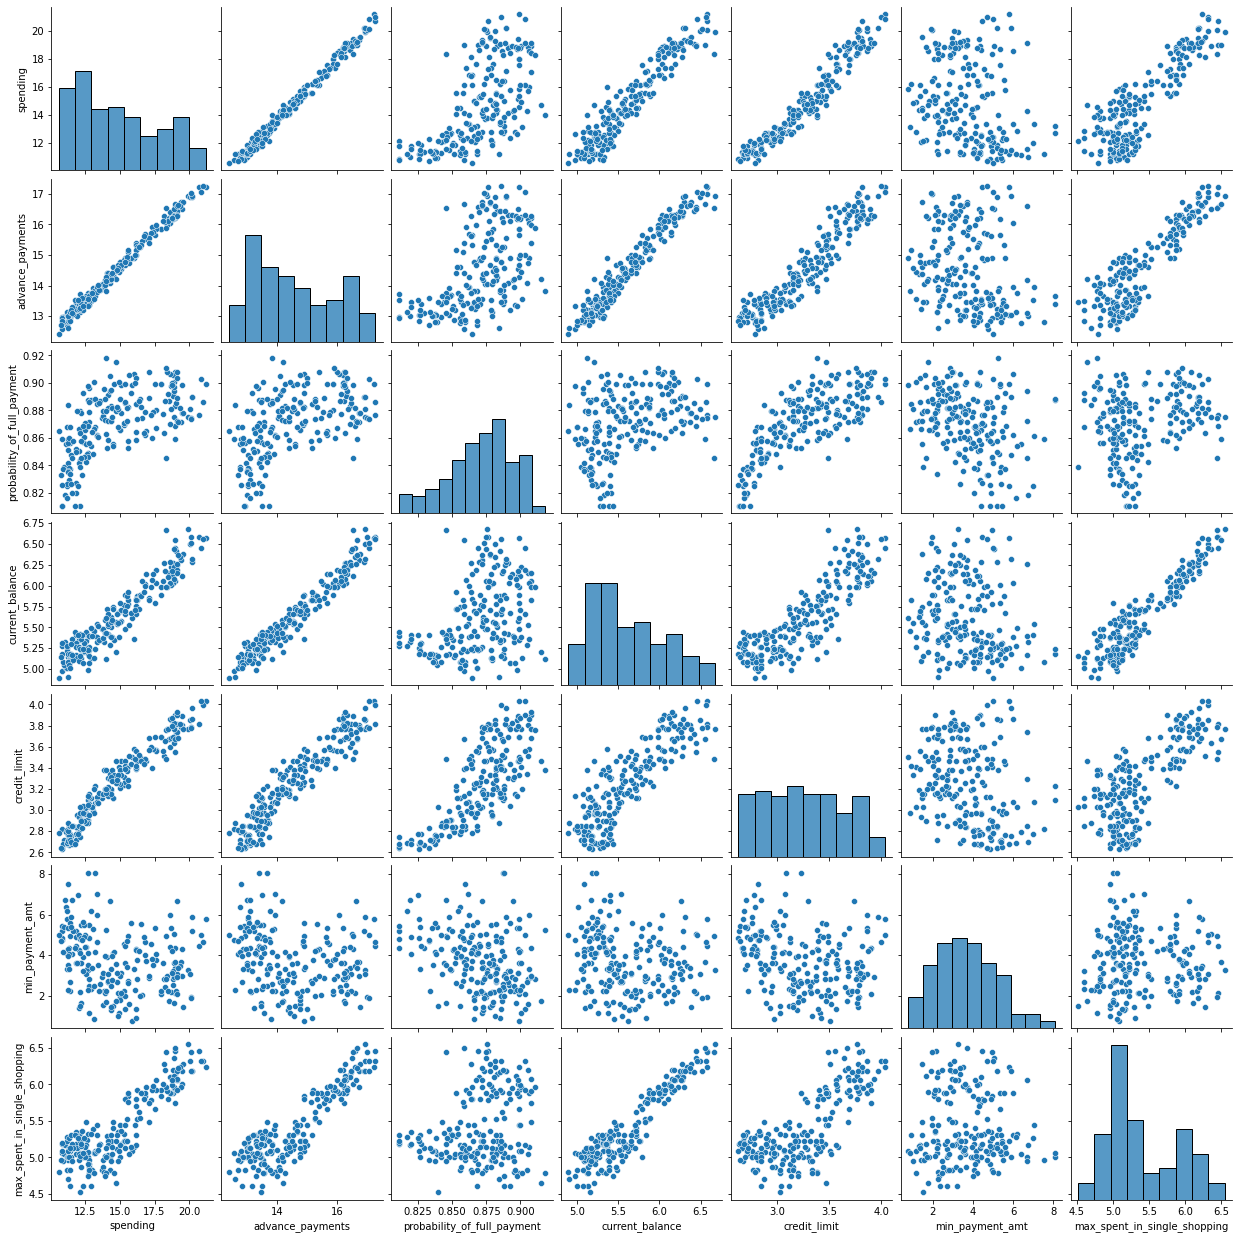

In [23]:
# pairplot

sns.pairplot(data = df)

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

####  
Let's have a look at few measure in order to decide when to scale the data before clustering or not

In [24]:
df.std()

spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023560
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.494689
max_spent_in_single_shopping    0.491480
dtype: float64

In [25]:
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

In [26]:
df.cov()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,8.466351,3.778443,0.041742,1.224704,1.066911,-0.998633,1.235133
advance_payments,3.778443,1.705528,0.016305,0.562666,0.466065,-0.423684,0.571753
probability_of_full_payment,0.041742,0.016305,0.000555,0.003846,0.006783,-0.011799,0.002630
current_balance,1.224704,0.562666,0.003846,0.196305,0.143992,-0.113046,0.203125
credit_limit,1.066911,0.466065,0.006783,0.143992,0.142668,-0.146211,0.139068
min_payment_amt,-0.998633,-0.423684,-0.011799,-0.113046,-0.146211,2.234095,-0.007056
max_spent_in_single_shopping,1.235133,0.571753,0.002630,0.203125,0.139068,-0.007056,0.241553


##  
Upon looking at various measure we can clearly say that the data needs to be sclaed. Since there are few variable which have high variance and it might dominate rest of the variables while clustering. Also, as we know ealier that some of the variables are measured in 100s and some in 1000s, scaling is absolutely necessary

In [27]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

x = StandardScaler()
scaled_df = x.fit_transform(df)

In [28]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [29]:
# Since the data is scaled we can create a new dataframe with the scaled data for clustering

scaled_df = pd.DataFrame(scaled_df, index = df.index, columns = df.columns)
scaled_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
5,-0.739821,-0.882135,0.696692,-1.007977,-0.444794,2.938945,-0.832274
6,-0.974080,-0.943539,-0.881773,-0.630155,-1.190520,0.384751,-0.204099
7,-0.381541,-0.390903,0.143591,-0.331518,-0.383756,-0.513228,-1.189192
8,1.144591,1.305384,-0.311654,1.453520,0.672468,-0.566208,1.764048
9,-1.246235,-1.288937,-0.847736,-1.105261,-1.230328,0.420965,-0.826156


In [30]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


Now we can see that all the data is scaled between 0 and 3. Thus, we have eliminated the chances of giving more importance to one variable than rest of the variable

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

HClust = linkage(scaled_df, method = 'ward')


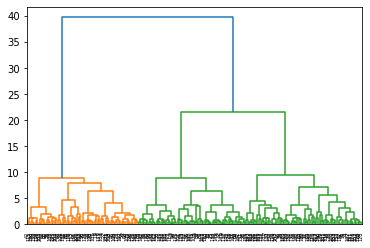

In [32]:
dend = dendrogram(HClust)

The dendogram clearly shows that there are two clusters or groups present in the given dataset

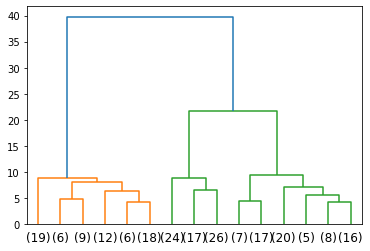

In [33]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 15,
                 )

In [34]:
# Identifying the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe

from scipy.cluster.hierarchy import fcluster

clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [35]:
clusters_2 = fcluster(HClust, 23, criterion='distance')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [36]:
# comparing both the clusters created using maxclust and distance method to confirm that are only 2 clusters

np.array_equal(clusters_1,clusters_2)

True

In [37]:
new_df = scaled_df.copy()
new_df['Hierarchy_clusters'] = clusters_1

In [38]:
new_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchy_clusters
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,2
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


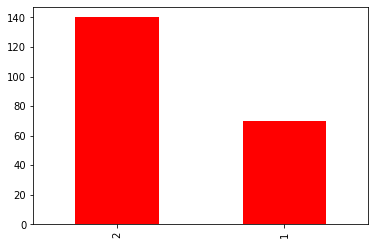

In [39]:
new_df['Hierarchy_clusters'].value_counts().plot(kind='bar', color = 'Red');

It can be concluded that out of the two groups most of the users fall under the cluster 3

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [40]:
from sklearn.cluster import KMeans

In [41]:
wss = []

In [42]:
val_range = range(1,11)
for i in val_range:
        KM = KMeans(n_clusters=i,)
        KM.fit(scaled_df)
        wss.append(KM.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [43]:
wss

[]

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

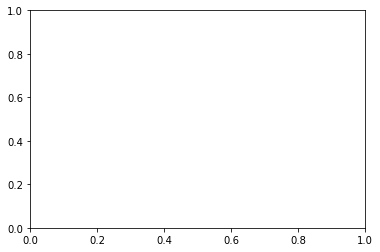

In [44]:
plt.plot(range(1,11), wss);

On looking at the plot as wss the cluster can be between 2 and 3. Let us proceed Further and find the perfect number of clusters

In [45]:
# using 2 clusters

kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(scaled_df)
label1 = kmeans1.labels_ 

In [46]:
df1 = scaled_df.copy()
df1['cluster'] = label1

In [47]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,0
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


In [48]:
# using 3 clusters

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(scaled_df)
label2 = kmeans2.labels_ 

In [49]:
df2 = scaled_df.copy()
df2['cluster'] = label2

In [50]:
df2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,2
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,2
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,1
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,2


#### Let's use the two dataframes created df1 and df2, to decide which cluster gives best result based on the silhoutte score

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
# calculating the the silhoutte score assuming clusters = 2

silhouette_score(scaled_df, label1)

0.46560100442748986

In [53]:
# calculating the the silhoutte score assuming clusters = 3

silhouette_score(scaled_df, label2)

0.4008059221522216

Comparing the silhouette score of both the clusters(2 & 3), earlier one has a a higher score.

In [54]:
# Let us compare the silhouette samples too before concluding the number of clusters

sil_width1 = silhouette_samples(scaled_df, label1)
print(sil_width1.min())
sil_width2 = silhouette_samples(scaled_df, label2)
print(sil_width2.min())

-0.005677379727717533
0.0027685411286160638


### Considering both the Silhouette scores and Silhouette samples, it can be concluded that the optimal cluster is 3

In [55]:
# Adding the label created for 2 cluster to the original dataset

df['kmeans_cluster'] = label2
df['sil_width'] = sil_width2
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans_cluster,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2,0.360972


In [56]:
df['kmeans_cluster'].value_counts()

1    72
0    71
2    67
Name: kmeans_cluster, dtype: int64

Based on the above clustering, there are three groups of customers namely High spending, Medium spending and Low spending